# Project Title: Predicting 🎯 the sale price of Bulldozers 🚜 using Machine Learning

## 1. Problem Definition:
> Predict the future price of a bulldozer based on its characteristics and past sales data of similar bulldozers.

## 2. Data Information:

The data is download form Kaggle Bluebook for Bulldozers competition:

Link: https://www.kaggle.com/c/bluebook-for-bulldozers/overview

The Data is divided into three parts:

* `Train.csv` is the training set, which contains data through the end of `2011`.

* `Valid.csv` is the validation set, which contains data from `January 1, 2012` - `April 30, 2012` You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.

* `Test.csv` is the test set, which won't be released until the last week of the competition. It contains data from `May 1, 2012` - `November 2012`. Your score on the test set determines your final rank for the competition.

- **Data Features:**
    
    Kaggle provide us the data dictionary detailing all of the feature of the dataset. 
    
    Google Sheet Link:https://docs.google.com/spreadsheets/d/1LdKxrebS8047Z0oYsSkt3bfGkIuxrHuWVu46BTkC27Q/edit?usp=sharing




### Expolatory Data analysis

In [1]:
# Importing libraries for EDA
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing Data:
df = pd.read_csv('Project_data/TrainAndValid.csv',
                low_memory=False,
                parse_dates=['saledate'])
# parse_dates take the column which contain dates

In [3]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Parsing Dates

NOTE: [When you're working with time series data, you have to enrich the time and data component as much as possible.]

[This task done by using pandas `read_csv` function parameter called `parse_dates`]

**Why Converting Dates dtype object to Datetime or parsing date**

It is very important to convert date-time column from object to datetime dtype because it helps you to:
- Perform accurate date calculations and comparisons.
- Easily filter and slice data by date ranges.
- Resample data to different time frequencies.
- Handle missing dates and interpolate values.
- Create effective time-based visualizations.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [5]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saledate
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05,412698
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03,2004-10-19 01:54:17.182733952
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00,1989-01-17 00:00:00
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00,2000-12-06 00:00:00
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00,2006-06-28 00:00:00
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03,2009-05-28 00:00:00
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06,2012-04-28 00:00:00
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,292.190243,2.716993e+04,NaN


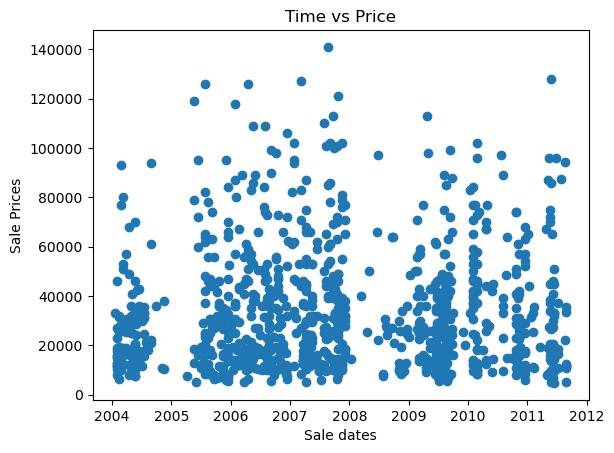

In [6]:
fig,ax = plt.subplots()
ax.scatter(df.saledate[:1000],df.SalePrice[:1000])
plt.xlabel("Sale dates")
plt.ylabel("Sale Prices")
plt.title("Time vs Price")
plt.show();

<Axes: >

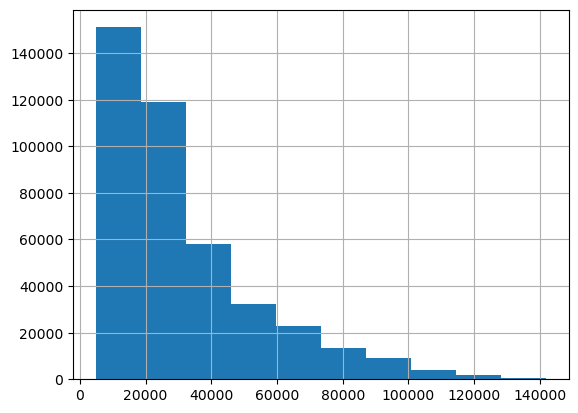

In [7]:
# data distribution
df.SalePrice.hist()

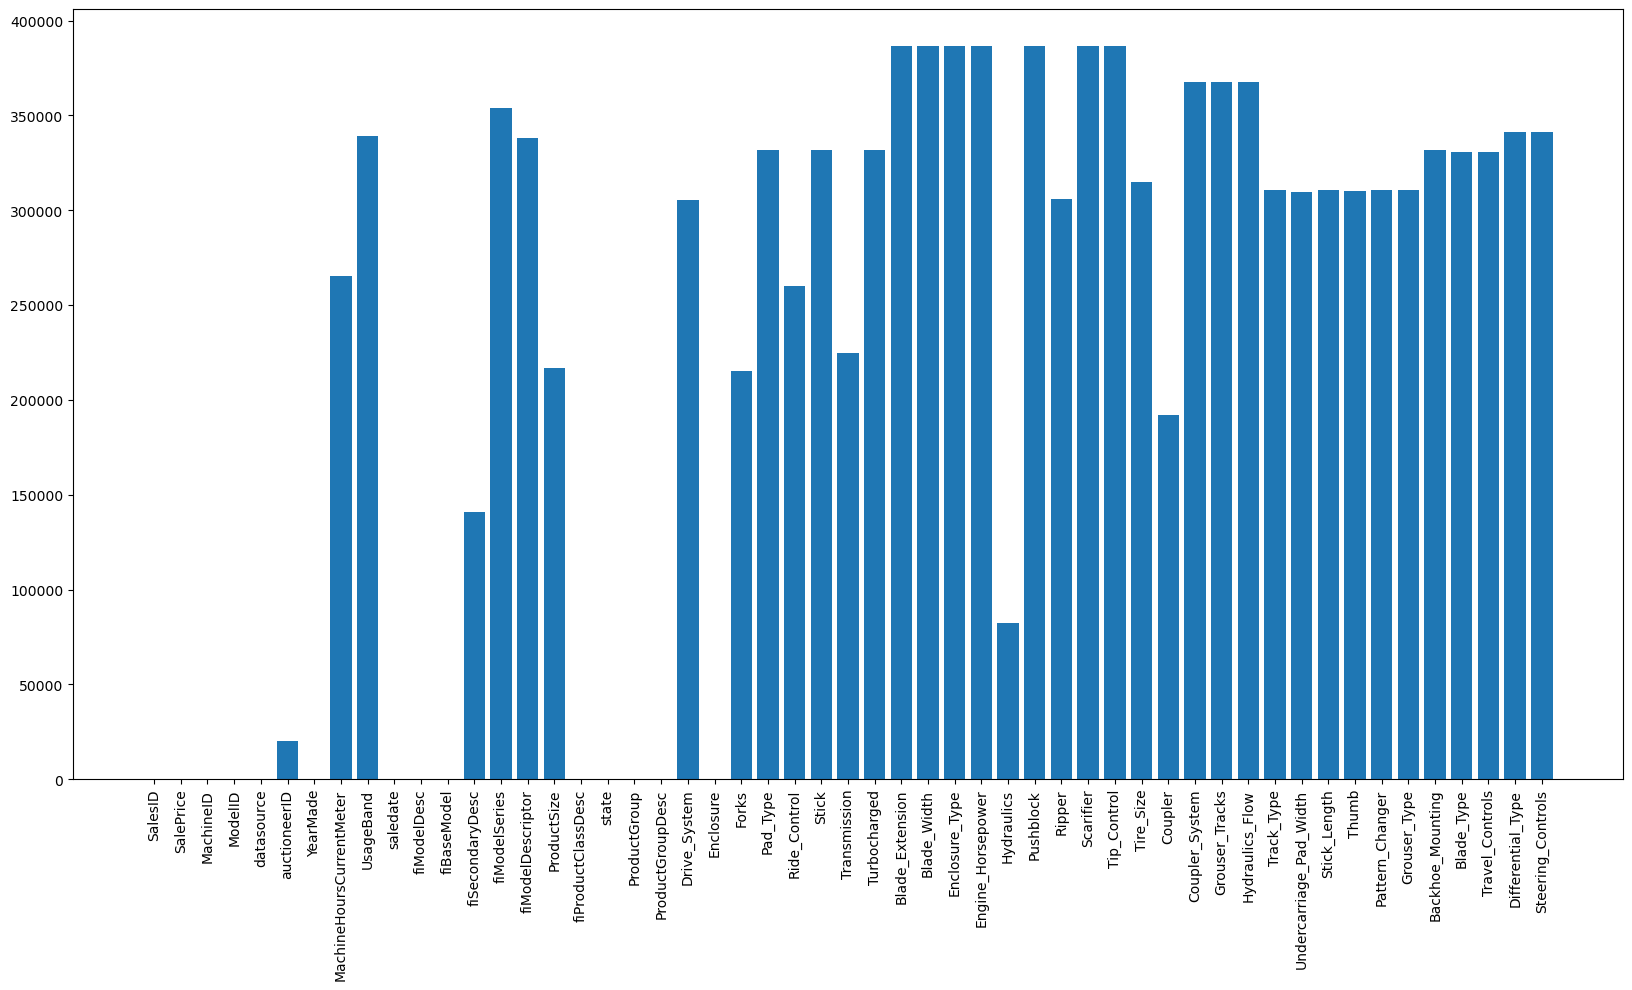

In [8]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(df.columns, df.isna().sum())
plt.xticks(rotation=90)  # Rotate x-axis labels if they are too long
plt.show();

In [9]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [10]:
df.dtypes

SalesID                              int64
SalePrice                          float64
MachineID                            int64
ModelID                              int64
datasource                           int64
auctioneerID                       float64
YearMade                             int64
MachineHoursCurrentMeter           float64
UsageBand                           object
saledate                    datetime64[ns]
fiModelDesc                         object
fiBaseModel                         object
fiSecondaryDesc                     object
fiModelSeries                       object
fiModelDescriptor                   object
ProductSize                         object
fiProductClassDesc                  object
state                               object
ProductGroup                        object
ProductGroupDesc                    object
Drive_System                        object
Enclosure                           object
Forks                               object
Pad_Type   

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

**Note:** [Before doing manupulation with original data, it is good practice to do manupulations on copy of original dataset]

In [12]:
df_man = df.copy()

In [13]:
df_man.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [14]:
df_man.shape

(412698, 53)

#### Enriching/ Imporving the `saledate column`

In [15]:
df_man.saledate[:1].dt.year

0    2006
Name: saledate, dtype: int32

In [16]:
df_man.saledate[:1].dt.day

0    16
Name: saledate, dtype: int32

In [17]:
df_man.saledate[:1].dt.month

0    11
Name: saledate, dtype: int32

In [18]:
df_man.saledate[:1]

0   2006-11-16
Name: saledate, dtype: datetime64[ns]

Since in order to make it more better and informative we'll imporve this column

In [19]:
df_man["SaleYear"] = df_man.saledate.dt.year
df_man["SaleMonth"] = df_man.saledate.dt.month
df_man["SaleDay"] = df_man.saledate.dt.day
df_man["SaleDayOfWeek"] = df_man.saledate.dt.dayofweek
df_man["SaleDayOfYear"] = df_man.saledate.dt.dayofyear

In [20]:
df_man.tail(10).T

,412688,412689,412690,412691,412692,412693,412694,412695,412696,412697
SalesID,6333305,6333314,6333330,6333339,6333343,6333344,6333345,6333347,6333348,6333349
SalePrice,11500.0,13000.0,20500.0,13000.0,10000.0,10000.0,10500.0,12500.0,10000.0,13000.0
MachineID,1800259,1908162,1879923,1856845,1799614,1919201,1882122,1944213,1794518,1944743
ModelID,21437,21437,21446,21435,21435,21435,21436,21435,21435,21436
datasource,149,149,149,149,149,149,149,149,149,149
auctioneerID,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0
YearMade,2006,2006,2006,2005,2005,2005,2005,2005,2006,2006
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,2012-02-13 00:00:00,2012-01-28 00:00:00,2012-01-28 00:00:00,2012-01-28 00:00:00,2012-02-13 00:00:00,2012-03-07 00:00:00,2012-01-28 00:00:00,2012-01-28 00:00:00,2012-03-07 00:00:00,2012-01-28 00:00:00


Now there is no need for saledate column we're gonna rid of it

In [21]:
df_man.drop('saledate',axis=1, inplace=True)

In [22]:
df_man.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'SaleYear', 'SaleMonth',
       'SaleDay', 'SaleDayOfWeek', 'SaleDayOfYear'],
      dtype

### Preprocessing the data

#### a) Converting the object data type to column

One way to convert all of our data into numbers by converting them into pandas category.

We can check the different datatypes compatible with pandas here:

Link: https://pandas.pydata.org/docs/reference/arrays.html

In [23]:
pd.api.types.is_object_dtype(df_man['UsageBand'])

True

In [24]:
df_man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

#### Checking out which features are object

In [25]:
for label, content in df_man.items():
    if pd.api.types.is_object_dtype(content) == True:
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


#### Converting obj to categories

In [26]:
for label, content in df_man.items():
    if pd.api.types.is_object_dtype(content) == True:
        df_man[label] = df_man[label].astype('category').cat.as_ordered()

In [27]:
df_man.dtypes

SalesID                        int64
SalePrice                    float64
MachineID                      int64
ModelID                        int64
datasource                     int64
auctioneerID                 float64
YearMade                       int64
MachineHoursCurrentMeter     float64
UsageBand                   category
fiModelDesc                 category
fiBaseModel                 category
fiSecondaryDesc             category
fiModelSeries               category
fiModelDescriptor           category
ProductSize                 category
fiProductClassDesc          category
state                       category
ProductGroup                category
ProductGroupDesc            category
Drive_System                category
Enclosure                   category
Forks                       category
Pad_Type                    category
Ride_Control                category
Stick                       category
Transmission                category
Turbocharged                category
B

#### b) Handling the Missing values

#### Filling the missing Numeric values

In [28]:
pd.api.types.is_numeric_dtype(df_man['SalePrice'])

True

In [29]:
for label,content in df_man.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
SaleYear
SaleMonth
SaleDay
SaleDayOfWeek
SaleDayOfYear


Now separate the null values

In [30]:
for label,content in df_man.items():
    if pd.api.types.is_numeric_dtype(content) == True:
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


#### Filling the missing values

Here we're filling the missing values with median.

**Why median??**

- **Mean**: Use the mean if the data is normally distributed (i.e., it follows a Gaussian distribution) without significant outliers. The mean is sensitive to outliers, so it might not be the best choice if the data contains extreme values.

- **Median**: Use the median if the data is skewed or contains outliers. The median is more robust and provides a better central tendency measure in these cases because it is not affected by extreme values

In [31]:
for label,content in df_man.items():
    if pd.api.types.is_numeric_dtype(content) == True:
        if pd.isnull(content).sum():
            # Adding a binary column which indicate that specific data was missing or not
            df_man[label+'_is_missing'] = pd.isnull(content)
            # Filling the missing values with median
            df_man[label] = content.fillna(content.median())

In [32]:
df_man.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

cross checking whether the data is filled or not

In [33]:
for label,content in df_man.items():
    if pd.api.types.is_numeric_dtype(content) == True:
        if pd.isnull(content).sum():
            print(label)

hence it give nothing it means all values have been filled

#### Filling the categories

**How categories work??**

It assign the specific numeric value to each of the category

In [34]:
df_man.state.cat.codes

0          0
1         32
2         31
3         43
4         31
          ..
412693    43
412694     8
412695     8
412696    43
412697     8
Length: 412698, dtype: int8

In [35]:
for label,content in df_man.items():
    if pd.api.types.is_numeric_dtype(content) == False:
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [36]:
for label, content in df_man.items():
    if pd.api.types.is_numeric_dtype(content) == False:
        # Adding a binary column
        df_man[label+'_is_missing'] = pd.isnull(content)
        # Turn Categories into number and add +1
        df_man[label] = pd.Categorical(content).codes +1

In [37]:
df_man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int32(5), int64(5), int8(40)
memory usage: 70.1 MB


In [38]:
df_man.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

### Spliting the data into Training and Validation Sets

When you're dealing with time series data it is good practice to make your own training and validation sets

you can check out the date range in data section on the top

In [39]:
df_val = df_man[df_man['SaleYear']==2012]
df_train = df_man[df_man['SaleYear']!=2012]

In [40]:
df_val.SaleYear

401125    2012
401126    2012
401127    2012
401128    2012
401129    2012
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: SaleYear, Length: 11573, dtype: int32

In [41]:
df_train.SaleYear

0         2006
1         2004
2         2004
3         2011
4         2009
          ... 
401120    2011
401121    2011
401122    2011
401123    2011
401124    2011
Name: SaleYear, Length: 401125, dtype: int32

In [42]:
df_val.shape,df_train.shape

((11573, 103), (401125, 103))

In [43]:
df_man.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,2,963,...,True,True,True,True,True,True,True,True,False,False
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,2,1745,...,True,True,True,True,True,True,True,True,False,False
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,1,336,...,True,True,True,True,True,True,True,True,True,True
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,1,3716,...,True,True,True,True,True,True,True,True,True,True
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,3,4261,...,True,True,True,True,True,True,True,True,True,True


#### Train and test sets X and y

In [44]:
X_train_set,y_train_set = df_train.drop('SalePrice',axis=1),df_train['SalePrice']
X_val_set,y_val_set = df_val.drop('SalePrice',axis=1),df_val['SalePrice']

In [45]:
X_train_set.shape,y_train_set.shape,X_val_set.shape,y_val_set.shape

((401125, 102), (401125,), (11573, 102), (11573,))

## Choosing the right Estimator

We're choosing the Random Forest Regressor for this task 

you can see a roadmap to choose the right estimator:

- Link: [https://scikit-learn.org/1.3/tutorial/machine_learning_map/index.html]

## Evaluation

The evaluation metric for this competition is the `RMSLE (root mean squared log error)` between the actual and predicted auction prices.

Link:[https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview]

We also look through:
- MAE
- R^2 Score

for training and validation set, after getting the best score then we'll make prediction on test dataset

In [46]:
# Importing evaluation metrices
from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score

#### Evaluation metics functions

In [47]:
def rmsle(y_test,y_preds):
    """
    This evaluation function takes the training set and prediction set
    """
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

def scoring(model):
    """
    This function will tell us the 
    """
    train_preds = model.predict(X_train_set)
    valid_preds = model.predict(X_val_set)
    score = {"MAE-Trianing-t":mean_absolute_error(y_train_set,train_preds),
            "MAE-validation-set":mean_absolute_error(y_val_set,valid_preds),
            "RMSLE-Training-set":rmsle(y_train_set,train_preds),
            "RMSLE-validation-set":rmsle(y_val_set,valid_preds),
             "R^2 Score-Training set":r2_score(y_train_set,train_preds),
             "R^2 Score validation set":r2_score(y_val_set,valid_preds)}
    return score

## Modeling

In [48]:
# Importing model
from sklearn.ensemble import RandomForestRegressor

**Note:** [We're dealing with very large data, and we can't fit the entire dataset at once because it would take too much time. Therefore, we only fit 10,000 samples and get the result.]

In [49]:
%%time
reg_model = RandomForestRegressor(n_jobs=-1,
                                 random_state=42,
                                 max_samples=10000)
reg_model.fit(X_train_set,y_train_set)

CPU times: total: 1min 10s
Wall time: 20.6 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

#### Scoring the model

In [50]:
scoring(reg_model)

{'MAE-Trianing-t': 5554.061618822063,
 'MAE-validation-set': 7139.615822172297,
 'RMSLE-Training-set': 0.25758465681614984,
 'RMSLE-validation-set': 0.29248380187626777,
 'R^2 Score-Training set': 0.8608402371243158,
 'R^2 Score validation set': 0.83308596217853}

Hence the model with less number of samples still giving us good results 

**Remember that**: [RMSE value with zero indicates that the model has a perfect fit. The lower the RMSE, the better the model and its predictions. A higher relative root mean square error in machine learning indicates that there is a large deviation from the residual to the ground truth.]

Let's try some hyperparameter tuning to enhance the accuracy of the model with reduced data

### Hyperparameter Tuning using Randomized search CV

In [51]:
%%time
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'n_estimators': np.arange(1,300,20),
             'max_depth':[None,3,5,10],
             'min_samples_split':np.arange(2,20,8),
             'min_samples_leaf': np.arange(2,20,10),
             'max_features': [0.5, 1, 'sqrt', 'log2'],
             'max_samples':[10000]}
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                               param_grid,
                              cv=5,
                              n_iter=10,
                              verbose=True)
rs_model.fit(X_train_set,y_train_set)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
CPU times: total: 1min 56s
Wall time: 4min 54s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'log2'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 2, 12]),
                                        'min_samples_split': array([ 2, 10, 18]),
                                        'n_estimators': array([  1,  21,  41,  61,  81, 101, 121, 141, 161, 181, 201, 221, 241,
       261, 281])},
                   verbose=True)

Here i'm doing the iteration of data just 2 times because it takes tooo much time to execute

#### scoring the tuned model

In [52]:
scoring(rs_model)

{'MAE-Trianing-t': 7098.69238563922,
 'MAE-validation-set': 8260.474379593816,
 'RMSLE-Training-set': 0.31483298454208747,
 'RMSLE-validation-set': 0.33268472006666505,
 'R^2 Score-Training set': 0.785010494407128,
 'R^2 Score validation set': 0.7844617730690978}

This model could perform be more better if we do 100 iterations or take whole data this time we fixed the max samples to 10,000 which wasn't sufficient but it is not possible yet because my processing power is not enough So it will take too much time

#### Making Ideal model or improving Hyperparameters

after searching a lot we've find out the best parameters which give us the very good  results

In [80]:
model_improve = RandomForestRegressor(n_estimators=40,
                                     min_samples_leaf=1,
                                     min_samples_split=14,
                                     max_features=0.5,
                                     n_jobs=-1,
                                     max_samples=None,
                                     random_state=42)

In [81]:
%%time
model_improve.fit(X_train_set,y_train_set)

CPU times: total: 3min 49s
Wall time: 1min 10s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

#### Scoring the imporved model

In [83]:
scoring(model_improve)

{'MAE-Trianing-t': 2951.123355082265,
 'MAE-validation-set': 5966.934781951541,
 'RMSLE-Training-set': 0.144427431435229,
 'RMSLE-validation-set': 0.246251621813037,
 'R^2 Score-Training set': 0.9589090179371786,
 'R^2 Score validation set': 0.8819835895768973}

That's amazing 

# It's Time to Predict with test dataset

#### Importing test csv

In [56]:
df_test = pd.read_csv('Project_data/Test.csv',
                      low_memory=False,
                      parse_dates=['saledate'])

In [57]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [58]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [59]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

In [60]:
df_test.dtypes

SalesID                              int64
MachineID                            int64
ModelID                              int64
datasource                           int64
auctioneerID                         int64
YearMade                             int64
MachineHoursCurrentMeter           float64
UsageBand                           object
saledate                    datetime64[ns]
fiModelDesc                         object
fiBaseModel                         object
fiSecondaryDesc                     object
fiModelSeries                       object
fiModelDescriptor                   object
ProductSize                         object
fiProductClassDesc                  object
state                               object
ProductGroup                        object
ProductGroupDesc                    object
Drive_System                        object
Enclosure                           object
Forks                               object
Pad_Type                            object
Ride_Contro

Hence test csv need some preprocessing 

In [61]:
def preprocess_data(df):
    '''
    Perform preprocessing on data which contains missing and non-numeric values
    '''
    df["SaleYear"] = df.saledate.dt.year
    df["SaleMonth"] = df.saledate.dt.month
    df["SaleDay"] = df.saledate.dt.day
    df["SaleDayOfWeek"] = df.saledate.dt.dayofweek
    df["SaleDayOfYear"] = df.saledate.dt.dayofyear
    
    df.drop('saledate',axis=1,inplace=True)
    
    # Filling the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content) == True:
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing or not
                df[label+"_is_missing"] = pd.isnull(content)
                # Filling the missing value
                df[label] = content.fillna(content.median())
    
        # Filling categorical missing data and turned categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # we add +1 to cat
            df[label] = pd.Categorical(content).codes +1
    return df

In [62]:
preprocess_data(df_test)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,3525.0,0,713,235,...,False,False,False,False,False,True,True,True,True,True
12453,6643173,2558332,21434,149,2,2005,3525.0,0,186,80,...,False,False,False,False,False,True,True,True,True,True
12454,6643184,2558342,21437,149,2,1000,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True
12455,6643186,2558343,21437,149,2,2006,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True


comparing

In [63]:
X_train_set.shape

(401125, 102)

In [64]:
df_test.shape

(12457, 101)

Oh...! one column is missing 

In [65]:
set(X_train_set.columns)-set(df_test.columns)

{'auctioneerID_is_missing'}

In [66]:
df_test['auctioneerID_is_missing'] = False

In [67]:
df_test.shape

(12457, 102)

#### Let's Predict

In [68]:
test_preds = model_improve.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


### Resolving Features name order issue error

Before doing serious manuplation make a copy of preprocess dataset

In [69]:
df_exp = df_test.copy()

In [70]:
# Check data types of training and test datasets
print(X_train_set.dtypes)

SalesID                           int64
MachineID                         int64
ModelID                           int64
datasource                        int64
auctioneerID                    float64
                                 ...   
Backhoe_Mounting_is_missing        bool
Blade_Type_is_missing              bool
Travel_Controls_is_missing         bool
Differential_Type_is_missing       bool
Steering_Controls_is_missing       bool
Length: 102, dtype: object


In [71]:
print(df_exp.dtypes)

SalesID                         int64
MachineID                       int64
ModelID                         int64
datasource                      int64
auctioneerID                    int64
                                ...  
Blade_Type_is_missing            bool
Travel_Controls_is_missing       bool
Differential_Type_is_missing     bool
Steering_Controls_is_missing     bool
auctioneerID_is_missing          bool
Length: 102, dtype: object


All the datatypes are same

In [72]:
# Check for extra features in df_tested
extra_features = set(df_exp.columns) - set(X_train_set.columns)
if extra_features:
    print(f"Extra features in test set: {extra_features}")

# Check for missing features in df_tested
missing_features = set(X_train_set.columns) - set(df_exp.columns)
if missing_features:
    print(f"Missing features in test set: {missing_features}")

Hence now feature is different of missing

In [73]:
# Reorder df_tested columns to match df_train columns
df_exp = df_exp[X_train_set.columns]

In [74]:
df_exp.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [75]:
# Checking length of copy and original after reordering
len(df_exp),len(df_test)

(12457, 12457)

Since both are same

#### Predict now

In [76]:
test_preds = model_improve.predict(df_exp)

In [77]:
test_preds[:100]

array([17323.79069043, 17166.79798407, 51431.26491442, 70764.99545505,
       57971.05820779, 27372.31458431, 25379.11750311, 12820.57666681,
       17396.78587211, 35599.09890053, 51607.06554167, 54717.76616331,
       35234.48335339, 39906.35535109, 23476.28221624, 23233.58966573,
       26087.11172346, 57388.71429903, 29754.7197658 , 39849.71415092,
       23989.35101299, 30432.91189584, 11590.98931575, 29482.67227784,
       13814.11402309, 30420.05230851, 26151.60101859, 13037.14861009,
       17704.90431805, 16722.46375091, 30814.54702434, 16801.57925791,
       34894.09768913, 10171.92587695, 40039.37956576, 13791.32823423,
       15717.18983152, 15459.28002451, 15023.17255652, 22528.14050403,
       31796.91275896, 14960.65023509, 43256.90249591, 55479.55360971,
       70885.11397206, 21604.69379874, 53857.95206153, 22843.76084966,
       11908.70384016, 31612.96571486, 27405.75369274, 13073.85112789,
       23915.62014629,  8179.27316892,  8130.07329807, 57793.10694102,
      

# Feature Importance

In [84]:
model_improve.feature_importances_

array([3.34924470e-02, 1.64748353e-02, 4.47004352e-02, 1.69028377e-03,
       3.28858493e-03, 2.02782264e-01, 3.13875078e-03, 9.83191106e-04,
       4.15237625e-02, 4.07149610e-02, 6.61902591e-02, 5.09205417e-03,
       1.78327762e-02, 1.49841216e-01, 4.75075898e-02, 5.96117040e-03,
       2.83186429e-03, 4.15283561e-03, 3.46774099e-03, 6.85760750e-02,
       6.46055813e-04, 8.22926053e-05, 7.84347964e-04, 2.50278281e-04,
       1.07596596e-03, 3.10663583e-04, 2.81785595e-03, 8.33504813e-03,
       8.27324018e-04, 2.31225006e-03, 3.67230453e-03, 8.23599337e-04,
       4.55895657e-03, 3.28528090e-04, 4.40520420e-03, 6.38225129e-03,
       8.20417927e-04, 1.21731513e-02, 2.59122437e-03, 2.22091122e-03,
       1.77194684e-03, 9.70894732e-04, 3.71483557e-03, 6.29108698e-04,
       4.29867961e-04, 3.51248285e-04, 6.65265644e-04, 1.64121118e-03,
       1.20260513e-03, 2.31213148e-04, 3.35331494e-04, 7.34100766e-02,
       3.76162877e-03, 5.65047051e-03, 2.90594983e-03, 9.92965774e-03,
      

In [91]:
# Helper function for plotting  feature importances
def plot_features(columns,importances,n=20):
    df = (pd.DataFrame({'features':columns,
                       'feature_importances':importances})
          .sort_values('feature_importances',ascending=False)
         .reset_index(drop=True))
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df['features'][:n],df['feature_importances'][:n])
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature Importances')
    ax.invert_yaxis()

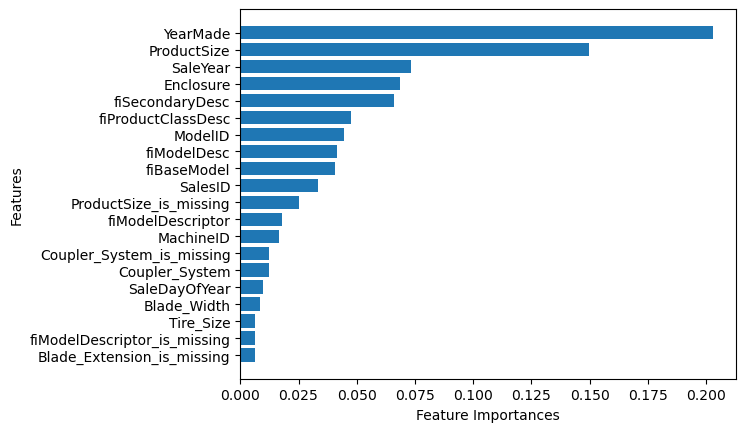

In [95]:
plot_features(X_train_set.columns,model_improve.feature_importances_,n=20)

here you clearly see the feature importance